
# Project: TMDb Movies investigation 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#posing questions">Posing questions</a></li>    
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#lim">Limitations</a></li>    
<li><a href="#ref">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Project outline**: This project investigates a dataset provided by [TMDb](https://www.themoviedb.org/?language=en) passing through all steps of the data analysis process, the data is collected for over *10,000* movie from *1966* to *2015*.
 

<a id='posing questions'></a>
## Posing questions 
> **Asking the right questions**: The first step was to have a first look at the data using Excel sheets, and building a first intuition about the questions this dataset might be able to answer.

An **important note** to make that this investigation handles three dependent variables alternatively `(revenue, vote and popularity)`, also four independent variables `(year of release, budget, homepage and runtime )`, out of which are drawn a sample of questions that might me posed:
- Does runtime affect the popularity of a movie, in other words, do most people tend to attend short or long movies? Also is it true that the longer the movie, the higher the budget?
- Does movies revenue and budget in general increases or decreases over years?
- What is the relation between the budget and the revenue?  
- What kinds of properties are associated with movies that have high revenues, large popularity and great voting!


In [1]:
import pandas as pd                  # to read and write csv files               
import matplotlib.pyplot as plt      # to create visualizations
import seaborn as sns                # to make visualizations more descent
% matplotlib inline                  

<a id='wrangling'></a>
## Data Wrangling

> **Getting the data ready**: World data is messy! It needs to be cleaned and trimmed to best fit the analysis process.
This is done in this section of the report, after which a clean version of the data will be ready for analysis.

### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')   # create a data-frame object
df.head()                             # printing the first few rows of the dataset 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()    # to gather informations about the columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> **Observatons**: 
- There are *10866* samples in the dataset and 21 different columns.
- Some columns are useless answering the posed questions, so they will be dropped.
- There are NULL values within the dataset that must be cleaned accordingly. 
- The data-type of different properties seems to be fairly appropriate, so nothing further to do there. 

In [4]:
df.describe()  # descriptive statistics for the different properties 

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>**Observations**:
- Budget, revenue and runtime for some samples are zero, these data must be dropped before the EDA step.

In [5]:
df.isnull().sum()    # to observe how many null values are there in the dataset

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
sum(df.duplicated())    # to observe how many dublicated data are there in the dataset

1

>**Observations**: 
- There are a few null values distributed over the columns. However it won't really matter as their columns will be dropped anyway.
- There is only one duplicate.

## To-Do list
> After studying the data, the next step is to set a to-do list as a reminder in the next stage of cleaning and trimming. 
- Drop rows that won't be of any use in analysis.
- Remove duplicated content. 
- Drop rows with issues, such as zero value.
- Creating new rows that will help ease the analysis derived from existing rows.

### Deleting unuseful rows and removing duplicates
A good question was to find the relation between the director of a movie and the population, vote to it. But after running the next code, you will soon realise that there are too many directors, after more investigation most of them only directed one movie.

In [7]:
print(df.director.nunique())  # number of unique values in the director column

5067


In [8]:
df.drop(['id', 'imdb_id', 'budget', 'revenue', 'cast','director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies', 'vote_count', 'release_date'], axis=1, inplace=True)  # dropping some coloumns
df.drop_duplicates(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 8 columns):
popularity        10865 non-null float64
original_title    10865 non-null object
homepage          2936 non-null object
runtime           10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 763.9+ KB


In [10]:
sum(df.duplicated()) # making sure that the duplicated content has been removed (even though it won't affect results that much!)

0

In [11]:
df.head()           # Displaying the new data after dropping columns 

,popularity,original_title,homepage,runtime,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,http://www.jurassicworld.com/,124,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,http://www.madmaxmovie.com/,120,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,http://www.thedivergentseries.movie/#insurgent,119,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,http://www.starwars.com/films/star-wars-episod...,136,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,http://www.furious7.com/,137,7.3,2015,1.747999e+08,1.385749e+09


### Removing rows that hold unaccepted zero values

In [12]:
df = df[(df[['runtime', 'budget_adj', 'revenue_adj']] != 0).all(axis=1)]   # removing rows that hold unaccepted zero values
df.describe()  # making sure that the operation is successful

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,109.220291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,1.475162,19.922820,0.794920,11.282575,4.480925e+07,2.161114e+08
min,0.001117,15.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462368,95.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,0.797511,106.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,1.368324,119.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,32.985763,338.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


> **Observations**:
The operation is successful.

### Creating new rows 
#### A row related to homepage column
At this point, for later analysis a new column will be created and hold a value of `True` if there is a homepage, and a value of `False` otherwise, then the *homepage* column will be dropped.

In [13]:
df['homepage_existence'] = df['homepage'].apply(lambda x: 'True' if not pd.isnull(x) else 'False') # creating a new column
df.drop('homepage', axis=1, inplace=True)  # dropping the homepage column
df.info()  # displaying info about the new cleaned data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 8 columns):
popularity            3854 non-null float64
original_title        3854 non-null object
runtime               3854 non-null int64
vote_average          3854 non-null float64
release_year          3854 non-null int64
budget_adj            3854 non-null float64
revenue_adj           3854 non-null float64
homepage_existence    3854 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 271.0+ KB


> **Observations**: 
There is no NULL values to be dropped, exactly as expected.

#### A row related to runtime 
Converting numerical data that the runtime column holds into categorical data for later analysis.

In [14]:
bin_edges = [14, 95, 106, 119, 180, 338]  # creating bin edges dependent on the descriptive statistics,
                                          # An intermediate value of 180 was placed within it.
bin_names = ['short', 'moderate', 'long', 'quite long', 'very long'] # converting into categorical data
df['rutime_category'] = pd.cut(df['runtime'], bin_edges, labels=bin_names) # creating a new column

In [15]:
df.info() # getting the info about the final version of the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 9 columns):
popularity            3854 non-null float64
original_title        3854 non-null object
runtime               3854 non-null int64
vote_average          3854 non-null float64
release_year          3854 non-null int64
budget_adj            3854 non-null float64
revenue_adj           3854 non-null float64
homepage_existence    3854 non-null object
rutime_category       3854 non-null category
dtypes: category(1), float64(4), int64(2), object(2)
memory usage: 274.9+ KB


> **Observations**:
The final version of the data contains *3854* samples and *9* columns.

In [16]:
df.head() # displaying the first few lines of the final version of the data

,popularity,original_title,runtime,vote_average,release_year,budget_adj,revenue_adj,homepage_existence,rutime_category
0,32.985763,Jurassic World,124,6.5,2015,1.379999e+08,1.392446e+09,True,quite long
1,28.419936,Mad Max: Fury Road,120,7.1,2015,1.379999e+08,3.481613e+08,True,quite long
2,13.112507,Insurgent,119,6.3,2015,1.012000e+08,2.716190e+08,True,long
3,11.173104,Star Wars: The Force Awakens,136,7.5,2015,1.839999e+08,1.902723e+09,True,quite long
4,9.335014,Furious 7,137,7.3,2015,1.747999e+08,1.385749e+09,True,quite long


<a id='eda'></a>
## Exploratory Data Analysis

### The impact of the runtime
Starting with the histogram for the runtime.

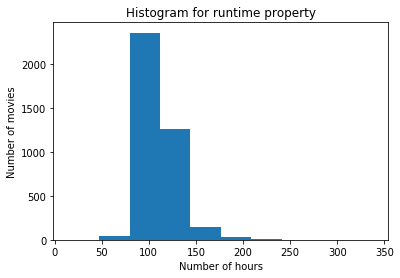

In [17]:
plt.hist(df['runtime']);  # histogram for the runtime 
plt.title('Histogram for runtime property');
plt.xlabel('Number of hours');
plt.ylabel('Number of movies');

> **Observations**:
Most movies are greater than 80 mins and less than around 120 mins.

Secondly, plotting popularity vs runtime.

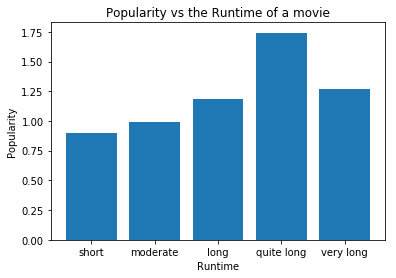

In [18]:
result = df.groupby('rutime_category')['popularity'].mean()       # obtaining a tulipe that holds the mean popularity values 
locations = [1, 2, 3, 4, 5]                                       # for each time category
heights = [result[0], result[1], result[2], result[3], result[4]]
labels = ['short', 'moderate', 'long', 'quite long', 'very long'] # plot labels
plt.bar(locations, heights, tick_label=labels);                   # creating the bar plot
plt.title('Popularity vs the Runtime of a movie')
plt.ylabel('Popularity') ;
plt.xlabel('Runtime') ;

> **Observations**:
Quite long `120 - 180 hours` movies seem to have the greatest popularity. 

Lastly, plotting budget vs runtime.

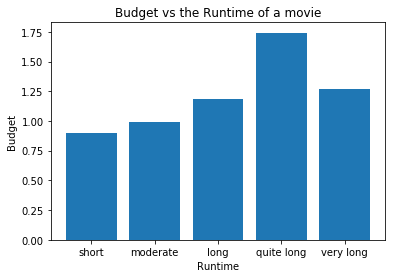

In [19]:
result = df.groupby('rutime_category')['popularity'].mean()       # obtaining a tulipe that holds the mean budget values 
locations = [1, 2, 3, 4, 5]                                       # for each time category
heights = [result[0], result[1], result[2], result[3], result[4]]
labels = ['short', 'moderate', 'long', 'quite long', 'very long'] # plot labels
plt.bar(locations, heights, tick_label=labels);                   # creating the bar plot
plt.title('Budget vs the Runtime of a movie')
plt.ylabel('Budget') ;
plt.xlabel('Runtime') ;

> **Observations**:
Quite long `120 - 180 hours` movies seem to have the greatest amount of budget, even higher than the very long ones `120 - 400 hours`! 

### Revenues and budgets through the year
Starting with plotting revenue vs the release year.

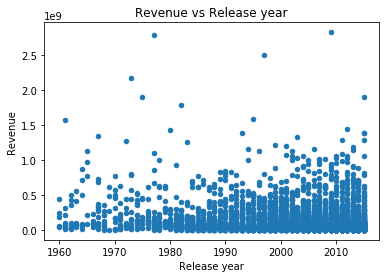

In [20]:
df.plot(x= 'release_year', y='revenue_adj' , kind='scatter'); # plotting revenue vs the release year 
plt.xlabel('Release year');
plt.ylabel('Revenue');
plt.title('Revenue vs Release year');

> **Observations**
The revenue of movies, generally increases with years.

Secondly, plotting revenue vs the release year.

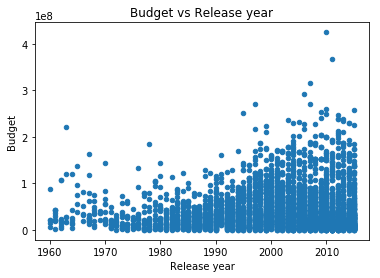

In [21]:
df.plot(x= 'release_year', y='budget_adj' , kind='scatter'); # plotting revenue vs the release year 
plt.xlabel('Release year');
plt.ylabel('Budget');
plt.title('Budget vs Release year');

> **Observations**
The budget of movies, generally increases with years.

###  Relation between the budget and the revenue

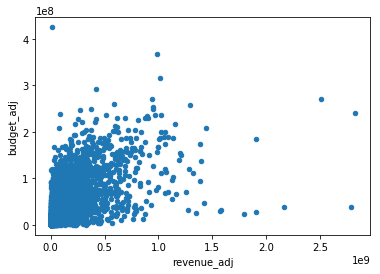

In [22]:
df.plot(x='revenue_adj', y='budget_adj', kind='scatter'); # plotting the relation between budget and revenue

> **Observations**:
Unlike expected, there is no clear correlation between budget and revenue!

### Different properties vs revenues, large popularity and great voting!
#### First property: Homepage existence
Starting with plotting how many movies have homepage and how many don't.

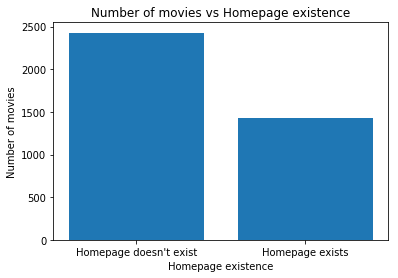

In [23]:
result = df.groupby('homepage_existence')['runtime'].count()    # plotting how many movies have homepage and how many don't
locations = [1, 2]
heights = [result[0], result[1]]
labels = ['Homepage doesn\'t exist', 'Homepage exists']
plt.bar(locations, heights, tick_label=labels);
plt.xlabel('Homepage existence')
plt.ylabel('Number of movies')
plt.title('Number of movies vs Homepage existence');

> **Observations**:
More movies tend to have no web page.

Secondly, plotting revenue vs homepage existence.

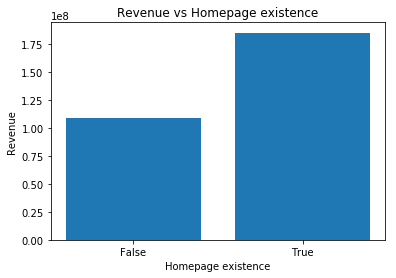

In [24]:
result = df.groupby('homepage_existence')['revenue_adj'].mean() # plotting revenue vs homepage existence
locations = [1, 2]
heights = [result[0], result[1]]
labels = ['False', 'True']
plt.bar(locations, heights, tick_label=labels);
plt.xlabel('Homepage existence')
plt.ylabel('Revenue')
plt.title('Revenue vs Homepage existence');

> **Observations** *Built only on descriptive statistics*:
- Movies that have webpage have greater revenues. 

Then, plotting population vs homepage existence.

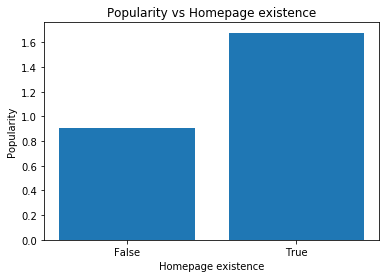

In [25]:
result = df.groupby('homepage_existence')['popularity'].mean() # plotting population vs homepage existence
locations = [1, 2]
heights = [result[0], result[1]]
labels = ['False', 'True']
plt.bar(locations, heights, tick_label=labels);
plt.xlabel('Homepage existence')
plt.ylabel('Popularity')
plt.title('Popularity vs Homepage existence');

> **Observations**:
- Movies that have webpage have wider popularity.

Lastly, plotting rating vs homepage existence.

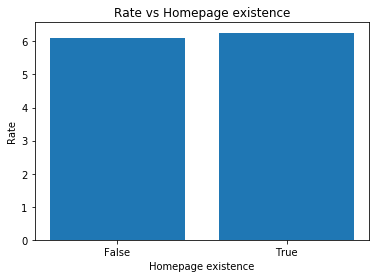

In [26]:
result = df.groupby('homepage_existence')['vote_average'].mean() # plotting population vs homepage existence
locations = [1, 2]
heights = [result[0], result[1]]
labels = ['False', 'True']
plt.bar(locations, heights, tick_label=labels);
plt.xlabel('Homepage existence')
plt.ylabel('Rate')
plt.title('Rate vs Homepage existence');

> **Observations**:
- No obvious difference in rate for movies which have webpage and which don't.

<a id='conclusions'></a>
## Conclusions

> **Conclusions summary**: 
According to the results obtained from the EDA stage:
- Most movies are greater than 80 mins and less than around 120 mins.
- Quite long `120 - 180 hours` movies seem to have the greatest popularity.
- Quite long `120 - 180 hours` movies seem to have the greatest amount of budget, even higher than the very long ones `120 - 400 hours`!
- The revenue of movies, generally increases with years.
- The budget of movies, generally increases with years.
- Unlike expected, there is no clear correlation between budget and revenue!
- More movies tend to have no web page.
- Movies that have webpage have greater revenues.
- Movies that have webpage have wider popularity.
- No obvious difference in rate for movies which have webpage and which don't.

<a id='lim'></a>
## Limitations
> **Analysis limitations**: To be specific, some limitations must be taken into consideration to rate the quality of the final conclusions of a data analysis process. In this project the limitations are: 
- The results of the analysis were based only on `Correlation` between two variables and `Descriptive statistics` for a certain variable, more precise analysis is usually based on `AI` and `Inferential Statistics`.
- At the beginning the data seemed fairly large enough, but having a closer look revealed that there is too many missed data, so the number of samples widely decreased which certainly affected the results.
- There was no clear definition for `Popularity`, also unfortunately this specific column has great spread. 
- `Vote count` wasn't taken into consideration which means that some `Vote average` might be biased.

<a id='ref'></a>
## References
- [Adding a new column to an existing data-frame](https://stackoverflow.com/questions/12555323/adding-new-column-to-existing-dataframe-in-python-pandas)
- [Drop rows with zero values using pandas](https://codereview.stackexchange.com/questions/185389/dropping-rows-from-a-pandas-dataframe-where-some-of-the-columns-have-value-0)